<a href="https://colab.research.google.com/github/Vaishnavilande/LGMVIP--DataScience/blob/main/Task_2_Music_Recommendation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Music Recommendation System**

Music recommender systems can suggest songs to users based on their listening patterns.

**Author: Vaishnavi Sanjay Lande.**

**Link for the dataset:**https://www.kaggle.com/c/kkbox-music-recommendation-challenge/data

# **Importing the Dependencies**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# **Loading the dataset**

In [ ]:
data_songs = pd.read_csv("/content/songs.csv")
data_songs_extra_info =  pd.read_csv("/content/song_extra_info.csv")
data_train = pd.read_csv("/content/train.csv")
data_test= pd.read_csv("/content/test.csv")
data_members= pd.read_csv("/content/members.csv")
data_sample_submission= pd.read_csv("/content/sample_submission.csv")

**Displaying all the datasets**

In [ ]:
data_songs

,song_id,song_length,genre_ids,artist_name,composer,lyricist,language
0,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247640.0,465,張信哲 (Jeff Chang),董貞,何啟弘,3.0
1,o0kFgae9QtnYgRkVPqLJwa05zIhRlUjfF7O1tDw0ZDU=,197328.0,444,BLACKPINK,TEDDY| FUTURE BOUNCE| Bekuh BOOM,TEDDY,31.0
2,DwVvVurfpuz+XPuFvucclVQEyPqcpUkHR0ne1RQzPs0=,231781.0,465,SUPER JUNIOR,NaN,NaN,31.0
3,dKMBWoZyScdxSkihKG+Vf47nc18N9q4m58+b4e7dSSE=,273554.0,465,S.H.E,湯小康,徐世珍,3.0
4,W3bqWd3T+VeHFzHAUfARgW9AvVRaF4N5Yzm4Mr6Eo/o=,140329.0,726,貴族精選,Traditional,Traditional,52.0
...,...,...,...,...,...,...,...
491797,CcKbqA4zQLeNVoVKOIoLtq73CevBV0o+uwFQ/ktXKmk=,290847.0,1180,Mighty Sparrow,NaN,NaN,52.0
491798,W902o2dyjyQhH9pvZSLHKVl6G1lTtsiu78oQdRvsMw0=,301749.0,2022,The Fray,Ben Wysocki|Dave Welsh|Joe King|Isaac Slade,Isaac Slade,52.0
491799,o/REOinyNHsUBG7+SZWLEkmHIWJ/262+4ks8viXZGwM=,243969.0,139,Various,Marsha Ambrosius| Canei Finch,Marsha Ambrosius| Canei Finch,52.0
491800,kPqDWpCoNOhQNFBh/IrlU/h7Nq+Gqba50etcWis5SeQ=,240013.0,1138,José Acedo,José David Acedo Morales,NaN,-1.0


In [ ]:
data_songs_extra_info

,song_id,name,isrc
0,LP7pLJoJFBvyuUwvu+oLzjT+bI+UeBPURCecJsX1jjs=,我們,TWUM71200043
1,ClazTFnk6r0Bnuie44bocdNMM3rdlrq0bCGAsGUWcHE=,Let Me Love You,QMZSY1600015
2,u2ja/bZE3zhCGxvbbOB3zOoUjx27u40cf5g09UXMoKQ=,原諒我,TWA530887303
3,92Fqsy0+p6+RHe2EoLKjHahORHR1Kq1TBJoClW9v+Ts=,Classic,USSM11301446
4,0QFmz/+rJy1Q56C1DuYqT9hKKqi5TUqx0sN0IwvoHrw=,愛投羅網,TWA471306001
...,...,...,...
594223,66FOh144VYrJwVCjcXG7aVXkc91p2YIkBkR08fkI/+E=,Hommage,GBPS81528004
594224,E/vD77k1RFNqRMvwZtfXIJUd0Qgpl4bbV4qVSfO711Q=,All We Know,CH6541622163
594225,IkV3km3yAheNcoS55LTVHFxUYh96ppuN00+i1NJY7Nc=,Kaper,DEPZ60863998
594226,sgFLqFqwXgUhYQGq/FUBDn/MaK1uNHnJ0WtQizJOL54=,Ritual Drum Dance,DEPZ69138010


In [ ]:
data_train

,msno,song_id,source_system_tab,source_screen_name,source_type,target
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1.0
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1.0
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1.0
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1.0
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1.0
...,...,...,...,...,...,...
336325,+agUSbrhYJizv5BsVhLns9lBJu/Qfi4YkKgvRbv+LLg=,4GVt9jSJ/86G2tLjEOFIHi8ZBMFX9Vt2tr42wmIWOio=,my library,Local playlist more,local-library,0.0
336326,+agUSbrhYJizv5BsVhLns9lBJu/Qfi4YkKgvRbv+LLg=,YMcJ0yyrvdX99KTeApz/Ulp6kArePG5moD/4WtkGWvE=,my library,Local playlist more,local-library,1.0
336327,+agUSbrhYJizv5BsVhLns9lBJu/Qfi4YkKgvRbv+LLg=,gkrYyKTT3AWQSCVHxRF0NIAYJi3xCkJawuhjGgjS/fE=,my library,Local playlist more,local-library,0.0
336328,+agUSbrhYJizv5BsVhLns9lBJu/Qfi4YkKgvRbv+LLg=,spj8Wad3vkmHef/+2lffRl6NN4LFFerZYUNo/mG+qFc=,my library,Local playlist more,local-library,1.0


In [ ]:
data_test

,id,msno,song_id,source_system_tab,source_screen_name,source_type
0,0,V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=,WmHKgKMlp1lQMecNdNvDMkvIycZYHnFwDT72I5sIssc=,my library,Local playlist more,local-library
1,1,V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=,y/rsZ9DC7FwK5F2PK2D5mj+aOBUJAjuu3dZ14NgE0vM=,my library,Local playlist more,local-library
2,2,/uQAlrAkaczV+nWCd2sPF2ekvXPRipV7q0l+gbLuxjw=,8eZLFOdGVdXBSqoAv5nsLigeH2BvKXzTQYtUM53I0k4=,discover,NaN,song-based-playlist
3,3,1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=,ztCf8thYsS4YN3GcIL/bvoxLm/T5mYBVKOO4C9NiVfQ=,radio,Radio,radio
4,4,1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=,MKVMpslKcQhMaFEgcEQhEfi5+RZhMYlU3eRDpySrH8Y=,radio,Radio,radio
...,...,...,...,...,...,...
340188,340188,TbSB6QdvlE/L215wXTA23JN8kVfpa4cO+VKd3V1vWDE=,et+vX2WHhRr5RmQm1+QZJPDezb9NcbPm/Tk16uuy95w=,my library,Local playlist more,local-library
340189,340189,TbSB6QdvlE/L215wXTA23JN8kVfpa4cO+VKd3V1vWDE=,3Yz717mUtR+r4L0zzgDgWnYeFtY9g68ZjKlq1U72KNw=,my library,Local playlist more,local-library
340190,340190,IVKHDb8k2xN+BzTcDaPh10uwFjadlbqWaU5WkKi0zyk=,u1IIrfB6jYyUQuJyo2h+aKiFC0me4LF1prHNkIQH94I=,my library,Local playlist more,local-library
340191,340191,IVKHDb8k2xN+BzTcDaPh10uwFjadlbqWaU5WkKi0zyk=,qL7GV9nKZIlb8NLbKnvsuQxtCg426aOrgi1Kh7ky82M=,my library,Local playlist more,local-library


In [ ]:
data_members

,msno,city,bd,gender,registered_via,registration_init_time,expiration_date
0,XQxgAYj3klVKjR3oxPPXYYFp4soD4TuBghkhMTD4oTw=,1,0,NaN,7,20110820,20170920
1,UizsfmJb9mV54qE9hCYyU07Va97c0lCRLEQX3ae+ztM=,1,0,NaN,7,20150628,20170622
2,D8nEhsIOBSoE6VthTaqDX8U6lqjJ7dLdr72mOyLya2A=,1,0,NaN,4,20160411,20170712
3,mCuD+tZ1hERA/o5GPqk38e041J8ZsBaLcu7nGoIIvhI=,1,0,NaN,9,20150906,20150907
4,q4HRBfVSssAFS9iRfxWrohxuk9kCYMKjHOEagUMV6rQ=,1,0,NaN,4,20170126,20170613
...,...,...,...,...,...,...,...
34398,Wwd/cudKVuLJ3txRVxlg2Zaeliu+LRUfiBmfrnxhRCY=,1,0,NaN,7,20131111,20170910
34399,g3JGnJX6Hg50lFbrNWfsHwCUmApIkiv2M8sXOaeXoIQ=,4,18,male,3,20141024,20170518
34400,IMaPMJuyN+ip9Vqi+z2XuXbFAP2kbHr+EvvCNkFfj+o=,1,0,NaN,7,20130802,20170908
34401,WAnCAJjUty9Stv8yKtV7ZC7PN+ilOy5FX3aIJgGPANM=,1,0,NaN,7,20151020,20170920


In [ ]:
data_sample_submission

,id,target
0,0,0.5
1,1,0.5
2,2,0.5
3,3,0.5
4,4,0.5
...,...,...
2556785,2556785,0.5
2556786,2556786,0.5
2556787,2556787,0.5
2556788,2556788,0.5


# **EDA on data_Songs dataset**

In [ ]:
for columns in data_songs.columns:
    print(columns)

song_id
song_length
genre_ids
artist_name
composer
lyricist
language


In [ ]:
data_songs.shape

(491802, 7)

In [ ]:
data_songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 491802 entries, 0 to 491801
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   song_id      491802 non-null  object 
 1   song_length  491801 non-null  float64
 2   genre_ids    478054 non-null  object 
 3   artist_name  491801 non-null  object 
 4   composer     274013 non-null  object 
 5   lyricist     105148 non-null  object 
 6   language     491801 non-null  float64
dtypes: float64(2), object(5)
memory usage: 26.3+ MB


In [ ]:
data_songs.describe()

,song_length,language
count,4.918010e+05,491801.000000
mean,2.475628e+05,29.541445
std,1.466551e+05,23.898785
min,1.079000e+03,-1.000000
25%,1.934680e+05,3.000000
50%,2.311310e+05,52.000000
75%,2.750780e+05,52.000000
max,1.096911e+07,59.000000


In [ ]:
data_songs.isnull()

,song_id,song_length,genre_ids,artist_name,composer,lyricist,language
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,True,True,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
491797,False,False,False,False,True,True,False
491798,False,False,False,False,False,False,False
491799,False,False,False,False,False,False,False
491800,False,False,False,False,False,True,False


In [ ]:
data_songs.isnull().sum()


song_id             0
song_length         1
genre_ids       13748
artist_name         1
composer       217789
lyricist       386654
language            1
dtype: int64

In [ ]:
data_songs.drop(['composer'], axis =1, inplace=True)
data_songs.drop(['lyricist'], axis =1, inplace=True)

In [ ]:
data_songs.isnull().sum()

song_id            0
song_length        1
genre_ids      13748
artist_name        1
language           1
dtype: int64

In [ ]:
data_songs.fillna(method='ffill', inplace=True)

In [ ]:
data_songs.isnull().sum()

song_id        0
song_length    0
genre_ids      0
artist_name    0
language       0
dtype: int64

# **Data Visualizations:**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


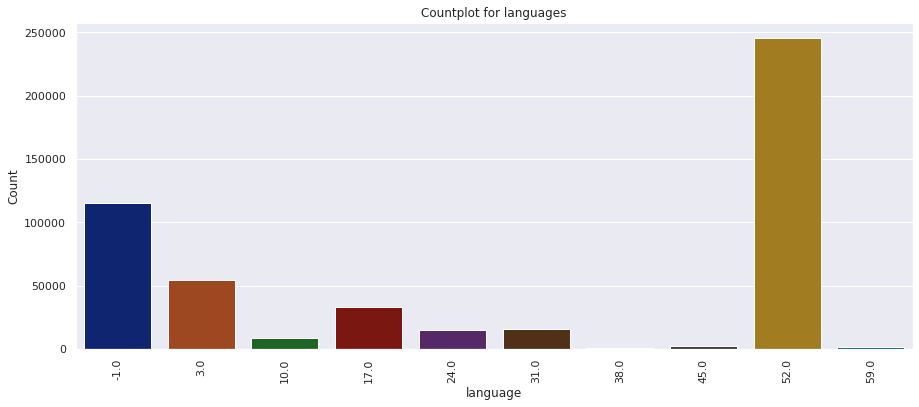

In [ ]:
plt.subplots(figsize=(15,6))
sns.barplot(data_songs['language'].value_counts().index,data_songs['language'].value_counts()[:].values,palette = 'dark')
plt.title('Countplot for languages')
plt.xlabel('language')
plt.ylabel('Count')
plt.xticks(rotation= 90)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


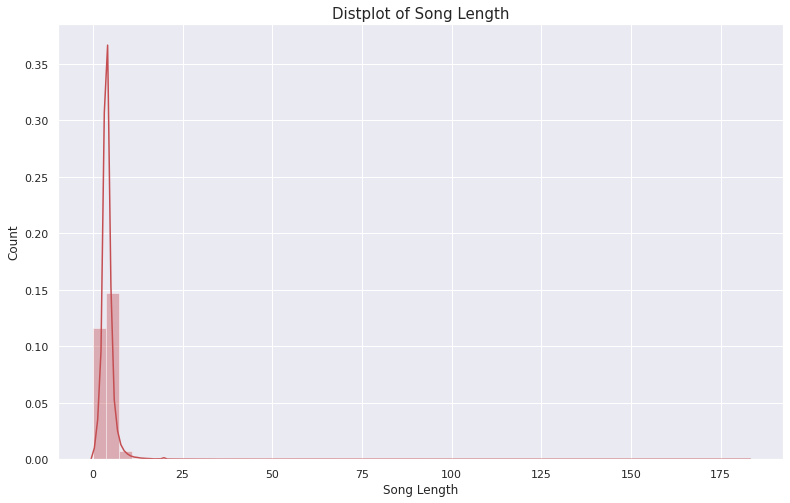

In [ ]:
plt.figure(figsize=(13, 8))
sns.set_style("darkgrid")
ax = sns.distplot(data_songs.song_length/60000, color='r')
ax.set_title('Distplot of Song Length', fontsize=15)
ax.set(xlabel='Song Length', ylabel='Count')
plt.show()

# **EDA on member dataset**

In [ ]:
for columns in data_members.columns:
    print(columns)

msno
city
bd
gender
registered_via
registration_init_time
expiration_date


In [ ]:
data_members.shape

(34403, 7)

In [ ]:
data_members.head()

,msno,city,bd,gender,registered_via,registration_init_time,expiration_date
0,XQxgAYj3klVKjR3oxPPXYYFp4soD4TuBghkhMTD4oTw=,1,0,NaN,7,20110820,20170920
1,UizsfmJb9mV54qE9hCYyU07Va97c0lCRLEQX3ae+ztM=,1,0,NaN,7,20150628,20170622
2,D8nEhsIOBSoE6VthTaqDX8U6lqjJ7dLdr72mOyLya2A=,1,0,NaN,4,20160411,20170712
3,mCuD+tZ1hERA/o5GPqk38e041J8ZsBaLcu7nGoIIvhI=,1,0,NaN,9,20150906,20150907
4,q4HRBfVSssAFS9iRfxWrohxuk9kCYMKjHOEagUMV6rQ=,1,0,NaN,4,20170126,20170613


In [ ]:
data_members.describe()

,city,bd,registered_via,registration_init_time,expiration_date
count,34403.000000,34403.000000,34403.000000,3.440300e+04,3.440300e+04
mean,5.371276,12.280935,5.953376,2.013994e+07,2.016901e+07
std,6.243929,18.170251,2.287534,2.954015e+04,7.320925e+03
min,1.000000,-43.000000,3.000000,2.004033e+07,1.970010e+07
25%,1.000000,0.000000,4.000000,2.012103e+07,2.017020e+07
50%,1.000000,0.000000,7.000000,2.015090e+07,2.017091e+07
75%,10.000000,25.000000,9.000000,2.016110e+07,2.017093e+07
max,22.000000,1051.000000,16.000000,2.017023e+07,2.020102e+07


In [ ]:
data_members.isnull().sum()

msno                          0
city                          0
bd                            0
gender                    19902
registered_via                0
registration_init_time        0
expiration_date               0
dtype: int64

In [ ]:
data_members.fillna(method='bfill', inplace=True)

In [ ]:
data_members.isnull().sum()

msno                      0
city                      0
bd                        0
gender                    3
registered_via            0
registration_init_time    0
expiration_date           0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Count plot for gender')

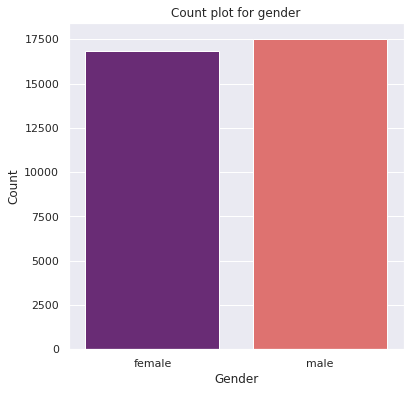

In [ ]:
plt.figure(figsize=(6,6))
sns.countplot(data_members['gender'], data=data_members, palette = 'magma')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation='0')
plt.title('Count plot for gender')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Count plot for Registation Method')

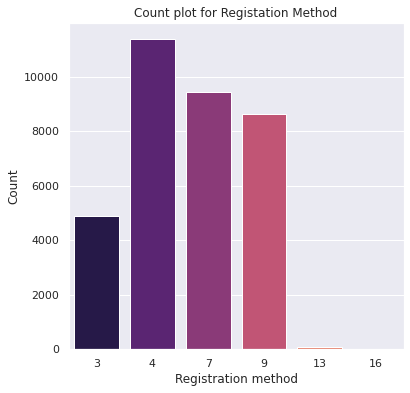

In [ ]:
plt.figure(figsize=(6,6))
sns.countplot(data_members['registered_via'], data=data_members, palette = 'magma')
plt.xlabel('Registration method')
plt.ylabel('Count')
plt.xticks(rotation='0')
plt.title('Count plot for Registation Method')

# **EDA on data_songs_extra_info dataset**

In [ ]:
for columns in data_songs_extra_info.columns:
    print(columns)

song_id
name
isrc


In [ ]:
data_songs_extra_info.head()

,song_id,name,isrc
0,LP7pLJoJFBvyuUwvu+oLzjT+bI+UeBPURCecJsX1jjs=,我們,TWUM71200043
1,ClazTFnk6r0Bnuie44bocdNMM3rdlrq0bCGAsGUWcHE=,Let Me Love You,QMZSY1600015
2,u2ja/bZE3zhCGxvbbOB3zOoUjx27u40cf5g09UXMoKQ=,原諒我,TWA530887303
3,92Fqsy0+p6+RHe2EoLKjHahORHR1Kq1TBJoClW9v+Ts=,Classic,USSM11301446
4,0QFmz/+rJy1Q56C1DuYqT9hKKqi5TUqx0sN0IwvoHrw=,愛投羅網,TWA471306001


In [ ]:
data_songs_extra_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 594228 entries, 0 to 594227
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   song_id  594228 non-null  object
 1   name     594226 non-null  object
 2   isrc     535321 non-null  object
dtypes: object(3)
memory usage: 13.6+ MB


In [ ]:
data_songs_extra_info.describe()

,song_id,name,isrc
count,594228,594226,535321
unique,594228,377418,474740
top,LP7pLJoJFBvyuUwvu+oLzjT+bI+UeBPURCecJsX1jjs=,Intro,GBPS81527413
freq,1,403,43


In [ ]:
data_songs_extra_info.isnull().sum()

song_id        0
name           2
isrc       58907
dtype: int64

In [ ]:
data_songs_extra_info.drop('isrc', axis = 1, inplace = True)

# **EDA on Training set**

In [ ]:
for columns in data_train.columns:
    print(columns)

msno
song_id
source_system_tab
source_screen_name
source_type
target


In [ ]:
data_train.shape

(336330, 6)

In [ ]:
data_train.isnull().sum()

msno                      0
song_id                   0
source_system_tab       915
source_screen_name    15065
source_type             653
target                    1
dtype: int64

In [ ]:
data_train['source_system_tab'].fillna('my library',inplace=True)
data_train['source_type'].fillna('local-library',inplace=True)
data_train['source_screen_name'].fillna('Local playlist',inplace=True)
data_train['target'].fillna(method='ffill', inplace=True)
data_train['song_id'].fillna(method='ffill', inplace=True)

In [ ]:
data_train.isnull().sum()

msno                  0
song_id               0
source_system_tab     0
source_screen_name    0
source_type           0
target                0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Count plot for system tab there are using')

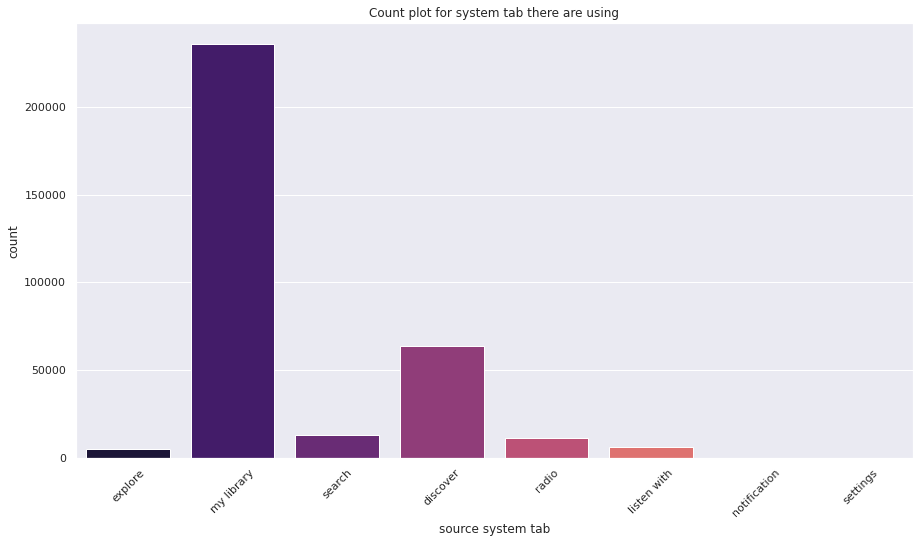

In [ ]:
plt.figure(figsize=(15,8))
sns.countplot(data_train['source_system_tab'],data=data_train, palette = 'magma')
plt.xlabel('source system tab')
plt.ylabel('count')
plt.xticks(rotation='45')
plt.title('Count plot for system tab there are using')

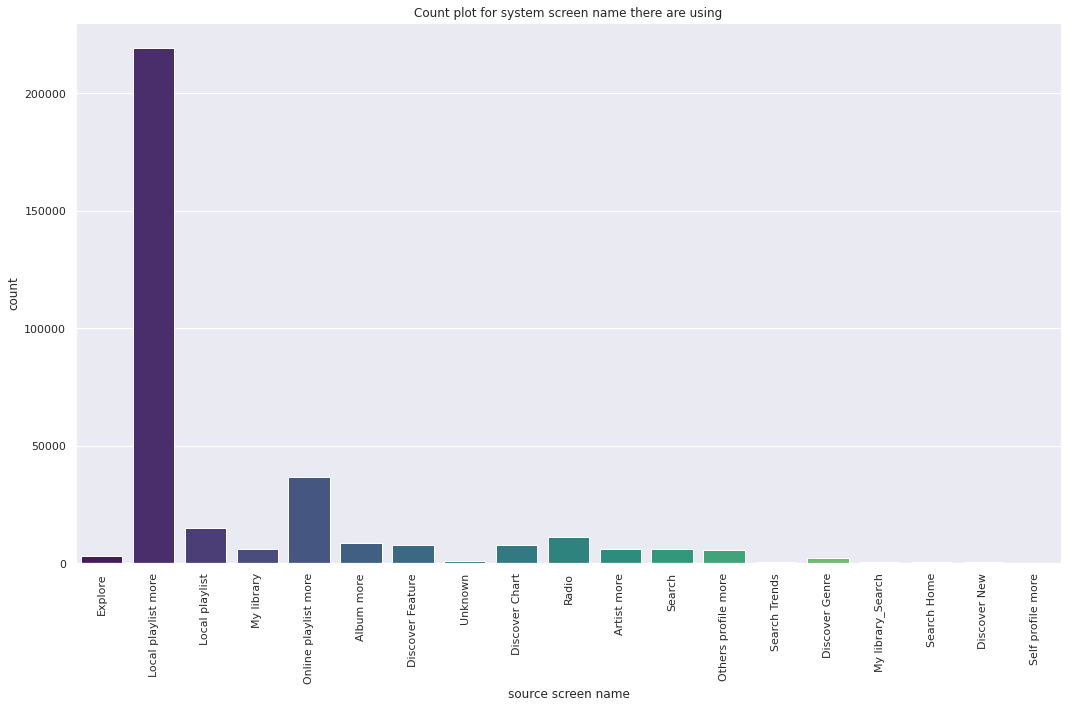

In [ ]:
plt.figure(figsize=(15,10))
sns.countplot(x=data_train['source_screen_name'],data=data_train, palette = 'viridis')
sns.set(style="darkgrid")
plt.xlabel('source screen name')
plt.ylabel('count')
plt.xticks(rotation='90')
plt.title('Count plot for system screen name there are using')
plt.tight_layout()

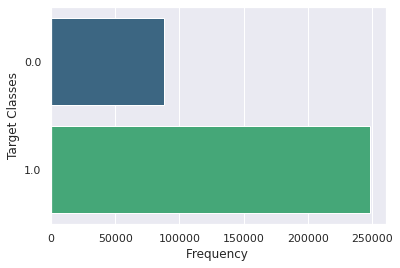

In [ ]:
sns.countplot(y=data_train['target'],data=data_train, palette = 'viridis')
plt.ylabel('Target Classes')
plt.xlabel('Frequency ')
plt.show()

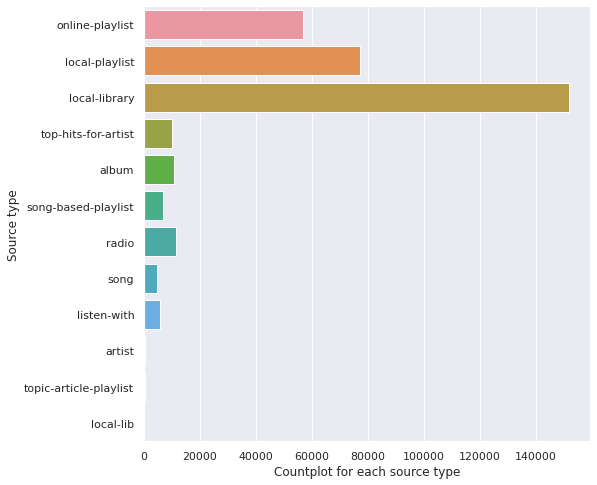

In [ ]:
plt.figure(figsize = (8,8))
sns.countplot(y=data_train['source_type'],data=data_train)
plt.ylabel('Source type')
plt.xlabel('Countplot for each source type')
plt.show()

# **Displaying information about the Test Dataset**

In [ ]:
for columns in data_test.columns:
    print(columns)

id
msno
song_id
source_system_tab
source_screen_name
source_type


In [ ]:
data_train.shape

(336330, 6)

# **Displaying information about the Sample Submission Dataset**

In [ ]:
for columns in data_sample_submission:
    print(columns)

id
target


In [ ]:
data_sample_submission.shape

(2556790, 2)

# **Merging the datasets**

In [ ]:
merged_songs = pd.merge(data_songs, data_songs_extra_info, on ='song_id' ,how='left')
merged_train_members = pd.merge(data_train, data_members, on ='msno' ,how='left')
train_data = pd.merge(merged_train_members, merged_songs, on ='song_id' ,how='left')

In [ ]:
train_data.shape

(336330, 17)

In [ ]:
train_data.columns

Index(['msno', 'song_id', 'source_system_tab', 'source_screen_name',
       'source_type', 'target', 'city', 'bd', 'gender', 'registered_via',
       'registration_init_time', 'expiration_date', 'song_length', 'genre_ids',
       'artist_name', 'language', 'name'],
      dtype='object')

# **Data Preprocessing**

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 336330 entries, 0 to 336329
Data columns (total 17 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   msno                    336330 non-null  object 
 1   song_id                 336330 non-null  object 
 2   source_system_tab       336330 non-null  object 
 3   source_screen_name      336330 non-null  object 
 4   source_type             336330 non-null  object 
 5   target                  336330 non-null  float64
 6   city                    336330 non-null  int64  
 7   bd                      336330 non-null  int64  
 8   gender                  336325 non-null  object 
 9   registered_via          336330 non-null  int64  
 10  registration_init_time  336330 non-null  int64  
 11  expiration_date         336330 non-null  int64  
 12  song_length             242239 non-null  float64
 13  genre_ids               242239 non-null  object 
 14  artist_name         

In [ ]:
train_data.describe()

,target,city,bd,registered_via,registration_init_time,expiration_date,song_length,language
count,336330.000000,336330.000000,336330.000000,336330.000000,3.363300e+05,3.363300e+05,2.422390e+05,242239.000000
mean,0.738391,7.654675,17.541337,6.804174,2.012742e+07,2.017153e+07,2.461194e+05,18.132865
std,0.439512,6.589459,20.027841,2.289534,2.988173e+04,3.612295e+03,5.334299e+04,20.959167
min,0.000000,1.000000,-43.000000,3.000000,2.004033e+07,2.004102e+07,2.716000e+03,-1.000000
25%,0.000000,1.000000,0.000000,4.000000,2.011063e+07,2.017091e+07,2.169300e+05,3.000000
50%,1.000000,5.000000,21.000000,7.000000,2.013100e+07,2.017093e+07,2.427290e+05,3.000000
75%,1.000000,13.000000,29.000000,9.000000,2.015093e+07,2.017101e+07,2.729270e+05,31.000000
max,1.000000,22.000000,1030.000000,13.000000,2.016120e+07,2.020102e+07,4.025318e+06,59.000000


In [ ]:
train_data.drop(['msno'], axis = 1, inplace=True)
train_data.drop(['song_id'], axis = 1, inplace=True)

In [ ]:
df = train_data

# **Label Encoding**

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
source_system_tab = encoder.fit_transform(df['source_system_tab'])
source_screen_name = encoder.fit_transform(df['source_screen_name'])
source_type = encoder.fit_transform(df['source_type'])
gender	= encoder.fit_transform(df['gender'])
artist_name = encoder.fit_transform(df['artist_name'])
name = encoder.fit_transform(df['name'])
genre_ids = encoder.fit_transform(df['genre_ids'])

In [ ]:
df['source_system_tab'] = source_system_tab
df['source_screen_name'] = source_screen_name
df['source_type'] = source_type
df['gender'] = gender
df['artist_name'] = artist_name
df['name'] = name
df['genre_ids'] = genre_ids

In [ ]:
df

,source_system_tab,source_screen_name,source_type,target,city,bd,gender,registered_via,registration_init_time,expiration_date,song_length,genre_ids,artist_name,language,name
0,1,6,6,1.0,1,0,1,7,20120102,20171005,NaN,235,7621,NaN,26634
1,3,8,5,1.0,13,24,0,9,20110525,20170911,NaN,235,7621,NaN,26634
2,3,8,5,1.0,13,24,0,9,20110525,20170911,225396.0,31,3401,52.0,5065
3,3,8,5,1.0,13,24,0,9,20110525,20170911,NaN,235,7621,NaN,26634
4,1,6,6,1.0,1,0,1,7,20120102,20171005,NaN,235,7621,NaN,26634
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336325,3,8,4,0.0,1,0,0,7,20150410,20170922,251297.0,138,2761,52.0,9133
336326,3,8,4,1.0,1,0,0,7,20150410,20170922,243298.0,138,3921,52.0,7139
336327,3,8,4,0.0,1,0,0,7,20150410,20170922,NaN,235,7621,NaN,26634
336328,3,8,4,1.0,1,0,0,7,20150410,20170922,249208.0,45,3170,52.0,23142


In [ ]:
df.isnull().sum()

source_system_tab             0
source_screen_name            0
source_type                   0
target                        0
city                          0
bd                            0
gender                        0
registered_via                0
registration_init_time        0
expiration_date               0
song_length               94091
genre_ids                     0
artist_name                   0
language                  94091
name                          0
dtype: int64

In [ ]:
df.dropna(subset = ['genre_ids', 'song_length', 'language'], inplace = True)
df.isnull().sum()

source_system_tab         0
source_screen_name        0
source_type               0
target                    0
city                      0
bd                        0
gender                    0
registered_via            0
registration_init_time    0
expiration_date           0
song_length               0
genre_ids                 0
artist_name               0
language                  0
name                      0
dtype: int64

In [ ]:
df.to_csv('preprocessed_data2.csv')
df1 = df[0:30000]

# **Model Building and Evaluation**

In [ ]:
Y = df1.target
X = df1.drop('target', axis = 1)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

In [ ]:
print("shape of x_train:",X_train.shape)
print("shape of x_test:",X_test.shape)

shape of x_train: (22500, 14)
shape of x_test: (7500, 14)


In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [ ]:
rfc = RandomForestClassifier()
rfc.fit(X_train, Y_train)
pred=rfc.predict(X_test)

# **Model Evaluation**

In [ ]:
accuracy_score(Y_test, pred)*100

81.84

In [ ]:
print ("Accuracy is :", accuracy_score(Y_test, pred)*100)

Accuracy is : 81.84


In [ ]:
confusion_matrix(Y_test, pred)

array([[ 743, 1089],
       [ 273, 5395]])

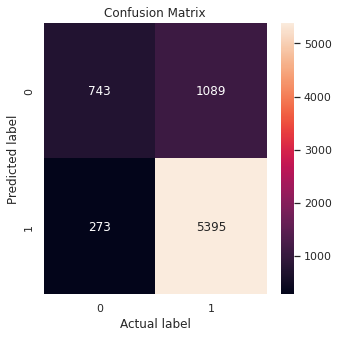

In [ ]:
plt.figure(figsize = (5,5))
sns.heatmap(confusion_matrix(Y_test, pred), annot = True, fmt = 'g')
plt.xlabel('Actual label')
plt.ylabel('Predicted label')
plt.title("Confusion Matrix")
plt.show()

# **Thank You.**